In [1]:
# Import libraries
import pandas as pd
import numpy as np
import cv2
from cv2 import imread, imwrite
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import os

In [2]:
# Read the csv file
label_dir = r"C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\malaria"
image_dir = r"C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\malaria\malaria\images"


label_names = [x for x in os.listdir(label_dir) if x.endswith('json')]
image_names = [x for x in os.listdir(image_dir)]
#print(image_names)
print(label_names)

['test.json', 'training.json']


In [3]:
training_json_dir = os.path.join(label_dir, label_names[1])

import json

with open(training_json_dir, 'r') as read_file:
    training_labels = json.load(read_file)

image1 = training_labels[0]

In [4]:
img_path = image1['image']['pathname']
img_path = label_dir + img_path

img = imread(img_path)


In [5]:
def plot_box(training_labels, image_number):
    image1 = training_labels[image_number]
    img_path = image1['image']['pathname']
    img_path = label_dir + img_path

    img = imread(img_path)

    boxes = image1['objects']
    for box in boxes:
        y1 = box['bounding_box']['minimum']['r']
        x1 = box['bounding_box']['minimum']['c']
        y2 = box['bounding_box']['maximum']['r']
        x2 = box['bounding_box']['maximum']['c']

        cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0),3)

    plt.imshow(img)

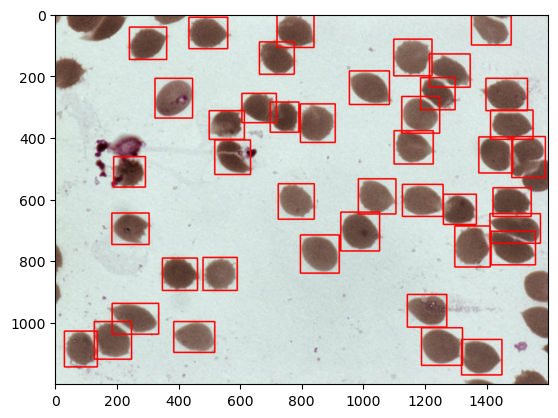

In [8]:
plot_box(training_labels, 3)

In [10]:
def extract_images(training_labels, image_number, path_to_save):
    image1 = training_labels[image_number]
    img_path = image1['image']['pathname']
    img_path = label_dir + img_path

    img = imread(img_path)

    boxes = image1['objects']
    for index, box in enumerate(boxes):
        y1 = box['bounding_box']['minimum']['r']
        x1 = box['bounding_box']['minimum']['c']
        y2 = box['bounding_box']['maximum']['r']
        x2 = box['bounding_box']['maximum']['c']

        cropped_image = img[y1:y2, x1:x2, :]
        resized_image = cv2.resize(cropped_image, (200,200))
        cv2.imwrite(f'{path_to_save}/image{image_number}_{index}.jpg', resized_image)



### Do not run unless you want to extract images

In [12]:
path_to_save = r'C:\Users\Bioimaging Lab\Desktop\Python Practice\Thesis\Yolo\datasets\cell\malaria\extracted_high_quality'

total_images = len(training_labels)
total_images = 10
for i in range(total_images):
    extract_images(training_labels, i, path_to_save)
